# point of this notebook is to inspect all the intermediary specs (and also the output spec) of spec_to_preprocessed_spec. 

In [60]:
import yaml
import numpy as np
from utils import db_transform, to_01, load, normed_spec, spec_to_wav, print_range
import global_objects
import torch
import global_objects
import librosa
import matplotlib.pyplot as plt
from transforms import spec_to_preprocessed_spec_inverse
import IPython
import tifresi

config = yaml.safe_load(open("config.yaml", "r"))

In [61]:
def show(array):
    plt.imshow(array, cmap='gray')
    plt.axis('off')
    plt.show()

def plot_histogram(spec):
    plt.hist(spec.flatten(), bins=100)
    plt.show()

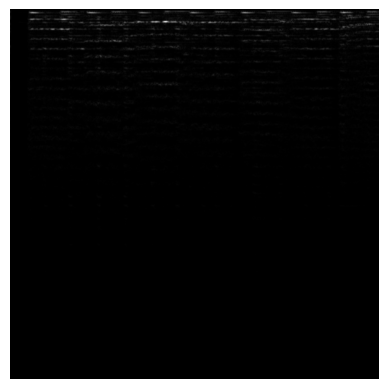

range: 2.865092426038137e-11 1.0


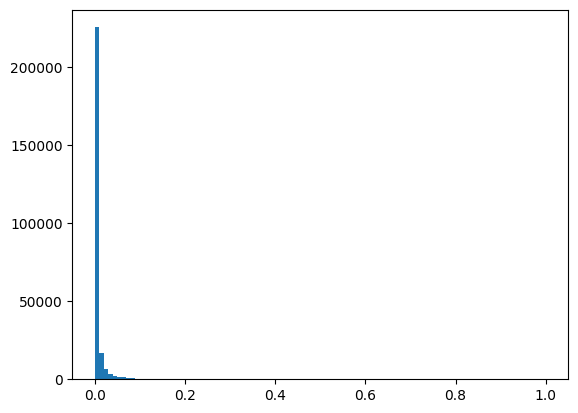

In [62]:
# BRAHMS SAMPLE
filename = librosa.util.example('brahms')
y = load(filename)
y = y[:int(config["spec_x_len"] / 2)]  
spec = normed_spec(y)
show(spec)
print_range(spec)
plot_histogram(spec)
IPython.display.Audio(global_objects.stft_system.invert_spectrogram(spec), rate=config["sampling_rate"])


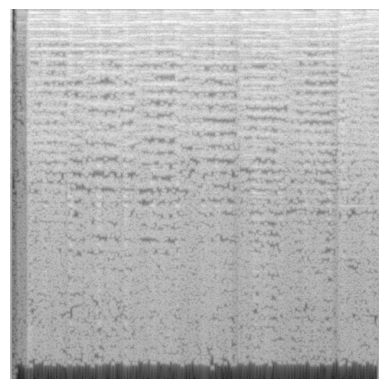

range: -105.42861363410067 0.0


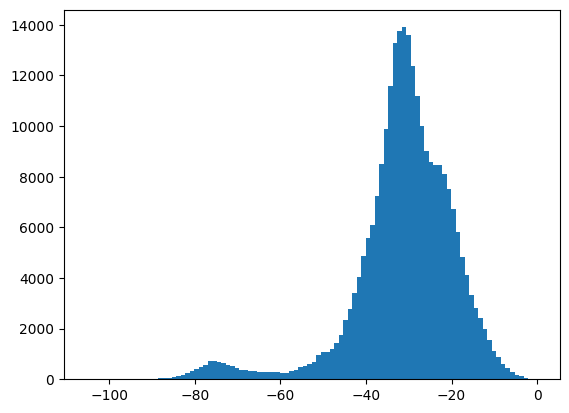

In [63]:
# DB TRANSFORM
spec = db_transform(spec)
show(spec)
print_range(spec)
plot_histogram(spec)

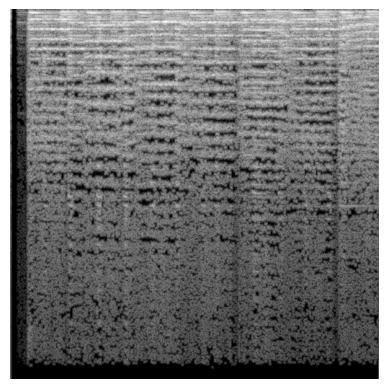

range: -50.0 0.0


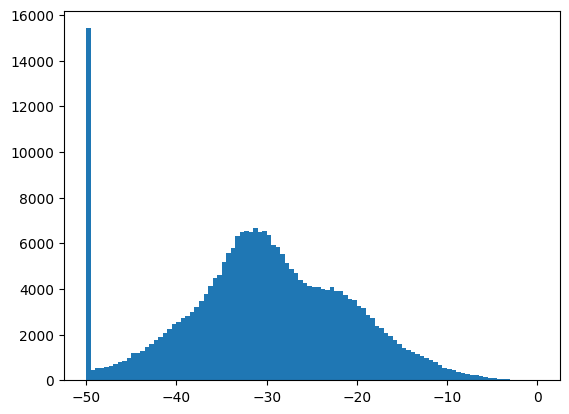

In [64]:
# CLIPPING
spec[spec < config["stft_min_val"]] = config["stft_min_val"]
show(spec)
print_range(spec)
plot_histogram(spec)

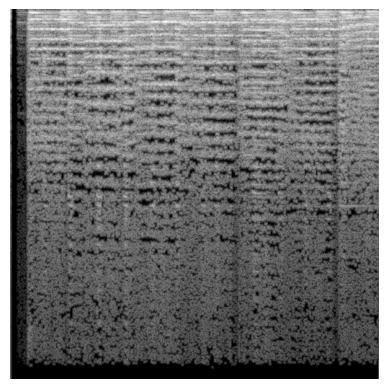

range: 0.0 50.0


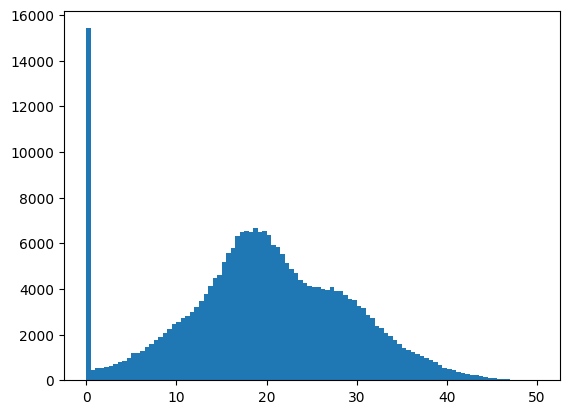

In [65]:
# SHIFTING
spec += abs(config["stft_min_val"])
show(spec)
print_range(spec)
plot_histogram(spec)
IPython.display.Audio(global_objects.stft_system.invert_spectrogram(spec), rate=config["sampling_rate"])

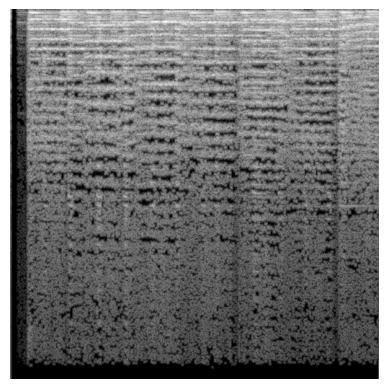

range: 0.0 1.0


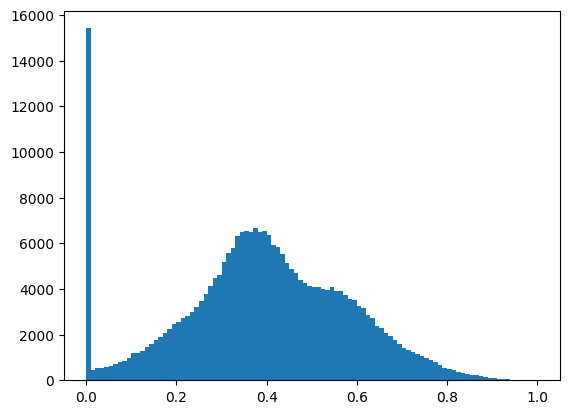

In [66]:
# NORMALIZATION
spec = to_01(spec, config["stft_dyn_range_upper_bound"])
show(spec)
print_range(spec)
plot_histogram(spec)
IPython.display.Audio(global_objects.stft_system.invert_spectrogram(spec), rate=config["sampling_rate"])

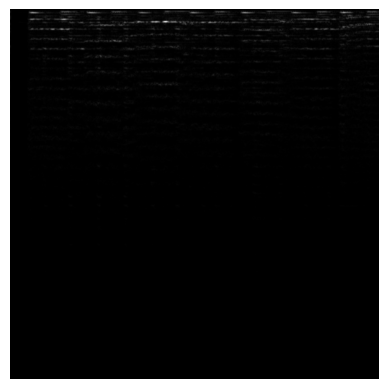

range: 1e-05 1.0


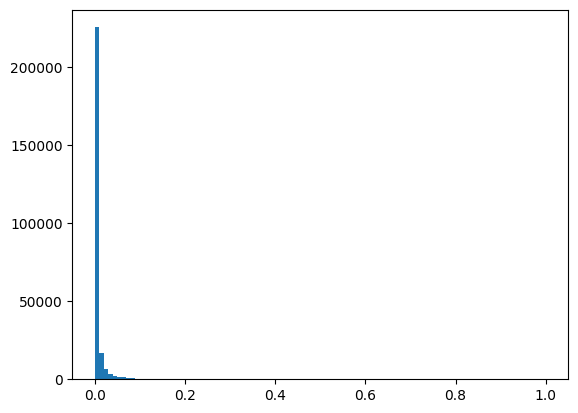

In [67]:
# INVERT
spec = spec_to_preprocessed_spec_inverse(spec, numpy=True)
show(spec)
print_range(spec)
plot_histogram(spec)
IPython.display.Audio(global_objects.stft_system.invert_spectrogram(spec), rate=config["sampling_rate"])